# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [2]:
# Import libraries and dependencies
import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [4]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
date_list = [["1991-02-16"],["2021-02-16"]]

# Find the total number of business days
limit = np.busday_count(date_list[0][0], date_list[1][0])

# Logic for data that is greater than Alpca's 1000 limit but below 2000 rows (5 year limit)
if limit > 1000: 
    newend = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1000)),"%Y-%m-%d")
    date_list[0].insert(1, newend)
    newstart = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1001)),"%Y-%m-%d")
    date_list[1].insert(0, newstart)
    ticker_data = []
    # Get TSLA historical data for data greater than 1000 rows
    for i in range(2):
        data = api.get_barset(
        ticker,
        timeframe,
        start = pd.Timestamp(date_list[i][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[i][1], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
        ticker_data.append(data)
    all_ticker_data = pd.concat(ticker_data, axis="rows", join="inner")
else:
    # Get TSLA historical data for data less than 1000 rows
    all_ticker_data = api.get_barset(
        ticker,
        timeframe,
        start = pd.Timestamp(date_list[0][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[1][0], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
    
all_ticker_data

TSLA                                      
                              open      high       low   close    volume
time                                                                    
2017-02-27 00:00:00-05:00  248.170  248.3600  242.0100  246.15   9576535
2017-02-28 00:00:00-05:00  244.020  251.0000  243.9000  249.99   5029562
2017-03-01 00:00:00-05:00  254.110  254.8500  249.1100  250.01   3928600
2017-03-02 00:00:00-05:00  249.710  253.2800  248.2700  250.47   2875091
2017-03-03 00:00:00-05:00  250.740  251.9000  249.0000  251.55   2477498
...                            ...       ...       ...     ...       ...
2021-02-09 00:00:00-05:00  855.120  859.8000  841.7500  849.25  14637362
2021-02-10 00:00:00-05:00  843.635  844.8200  800.0200  805.00  35012591
2021-02-11 00:00:00-05:00  812.440  829.8799  801.7250  811.65  19600887
2021-02-12 00:00:00-05:00  801.260  817.3300  785.3306  816.04  22494684
2021-02-16 00:00:00-05:00  818.000  821.0000  792.4400  795.99  18606374

[1000 rows x 5 columns]

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = all_ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [5]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.026620,0.964212,1.026343,1.187523,1.028373,0.972439,0.976839,0.962178,1.007082,1.049178,...,1.015757,0.992047,0.987833,0.968658,0.889853,1.050282,0.983780,1.065987,0.999246,1.069209
2,1.023667,0.965535,1.007405,1.176306,0.994246,0.998054,1.035253,0.975445,0.985803,1.168976,...,0.942108,0.840483,1.056853,0.999560,0.821696,1.117795,1.023676,1.068245,1.075002,1.193203
3,0.930075,1.012802,1.009250,1.288031,0.939941,0.978373,1.163615,0.972605,0.898563,1.203600,...,0.929007,0.804514,1.036748,1.003493,0.828807,1.118587,1.029023,1.114029,1.097328,1.272832
4,0.936782,0.971347,0.966924,1.292693,0.942122,0.925629,1.273598,0.911934,0.940744,1.139152,...,0.997231,0.742252,1.052802,1.036119,0.812219,1.184620,1.023570,1.063053,1.070607,1.246653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,10.214690,1.510060,0.658380,7.362662,4.592035,17.707702,5.372927,1.486152,12.404079,0.975937,...,3.232235,1.415173,3.777010,6.142895,108.758071,0.622922,0.724583,4.390819,2.320951,3.241879
753,9.378181,1.584674,0.673172,6.488413,4.278096,18.158285,5.662655,1.498028,11.698571,0.916186,...,3.009270,1.517230,3.839761,5.848584,104.366031,0.595882,0.738822,4.430745,2.456776,2.914839
754,9.260920,1.507239,0.704510,6.304299,4.182485,17.786536,5.840345,1.422978,11.756622,0.938543,...,3.041403,1.566185,3.834196,5.851866,109.642233,0.609546,0.735578,4.441806,2.378522,3.055866
755,9.499723,1.547846,0.763692,5.934011,4.319432,18.780689,6.142830,1.310147,11.791456,0.909077,...,2.973724,1.520562,3.769535,6.037818,116.350538,0.605471,0.786100,4.420005,2.198389,3.133585


### Plot the Simulated Daily Returns Trajectory for `TSLA` over the Next Year (252 Trading Days)

In [6]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004226,1.004687,0.780067,1.187523
2,1.008799,1.008092,0.804904,1.262750
3,1.014802,1.011977,0.749323,1.350477
4,1.019737,1.010904,0.740432,1.351159


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of TSLA Stock Over the Next Year'}>

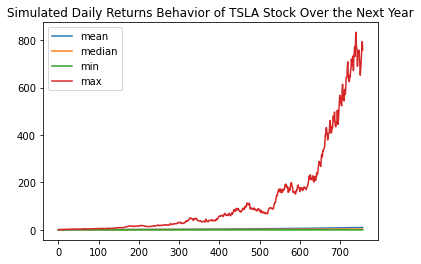

In [7]:
# Use the `plot` function to visually analyze the trajectory of TSLA stock daily returns on the next three years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of TSLA Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [8]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10042.255576,10046.868884,7800.672993,11875.228253
2,10087.985965,10080.921855,8049.038030,12627.501252
3,10148.024720,10119.771613,7493.230689,13504.768197
4,10197.366617,10109.042880,7404.324831,13511.589698


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of TSLA Stock Over the Next Year'}>

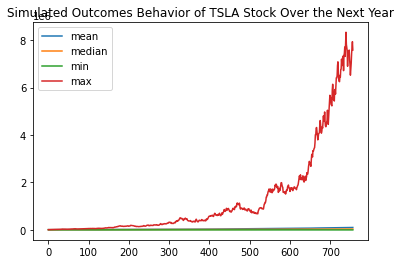

In [9]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of TSLA Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean              10.293723
std               31.777377
min                0.034727
25%                1.434551
50%                3.634045
75%                9.932682
max              758.341240
95% CI Lower       0.202893
95% CI Upper      53.030910
Name: 756, dtype: float64


In [11]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $2028.93 and $530309.1.
